# Week 10 - Constrained Optimization and Sparse Kernel Machines

Learning contents:

* Constrained Optimization
    * Reformulate the problem as a maximization problem
    * Write out the Lagrangian function
    * Compute the gradients with respects to $x_1, x_2$, Lagrange multiplier $\lambda$ and the KKT multiplier $\mu$
    * Compute the optimum
* Support Vector Machine
    * Fit a linear SVM classifier, and plot the decision boundary, margin, and support vectors
    * Fit a non-linear SVM classifier using the RBF kernel, and plot the decision boundary, margin, and support vectors
    * Compare C=1 with C=1000 on the RBF-kernel SVM-classifier. What is the effect of a larger C? What could be the downside of a very large C?

In [8]:
# Dependencies
import numpy as np
import scipy
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA 
from sklearn.svm import SVC
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set(); sns.set_palette('bright')

# 1) Constrained Optimization
 
Consider the problem

minimize $$f_{min}(x_1, x_2)$$

subject to $$ x_1 + x_2 \leq 4 
\quad \text{ and } \quad x_1 + 4x_2 = 5 
$$
where $$f_{min}(x_1, x_2) = (x_1 - 3)^2 + (x_2 - 2)^2$$

## 1.1) Reformulate the problem as a canonical maximization problem
_Use the form described in the end of "Pattern Recognition and Machine Learning" Appendix E._

## 1.2) Write out the Lagrangian function
_Use Equation (E.12) in "Pattern Recognition and Machine Learning" Appendix E., and write out all variables_

## 1.3) Compute the gradients with respects to $x_1, x_2$, lagrange multiplier $\lambda$ and the KKT multiplier $\mu$

## 1.4) Compute the optimum
_Hint: Set it up as a system of linear equations and solve it using Gaussian Elimination (e.g. using `scipy.linalg.solve`)_

# 2) Support Vector Machines
As usual, we'll be working with a dataset of handwritten digits. 
Let visualise some examples.

In [5]:
# We're using a subset of two classes
digits = load_digits(n_class=2)

In [6]:
# We can get a 2D version of the data using PCA
pca = PCA(n_components=2)
t = 2* digits.target -1 # {-1,1}
X = pca.fit_transform(digits.data)

# In order to get a non-linearly seperable case, 
# we'll modify the data a bit this time, 
# translating the '-1' class to the right
X = np.where(
    np.repeat(np.expand_dims(t == 1, axis=1), 2, axis=1), 
    X, 
    np.vstack([X[:,0]+15, X[:,1]]).T
)

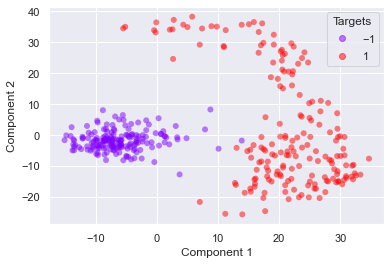

In [7]:
# Let's plot all the data in 2D
def plot_scatter(data, target, alpha=0.5, legend=True):
    scatter = plt.scatter(data[:, 0], data[:, 1], c=target, edgecolor='none', alpha=alpha, cmap='rainbow')
    if legend:
        plt.legend(*scatter.legend_elements(), loc="upper right", title="Targets")
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    
plot_scatter(X, t)

## 2.1) Fit a linear SVM classifier, and plot the decision boundary, margin, and support vectors
_Hint: use the SVM classifier from scikit-learn. The default C=1 will do just fine_

## 2.2) Fit a non-linear SVM classifier using the RBF kernel, and plot the decision boundary, margin, and support vectors

## 2.3) Compare C=1 with C=1000 on the RBF-kernel SVM-classifier. What is the effect of a larger C? What could be the downside of a very large C?